# Digit Recognition on MNIST Dataset 

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 imgs of handwritten digits

In [7]:
(x_train, y_train) , (x_test,y_test)=mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

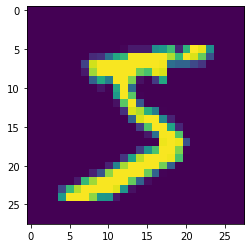

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

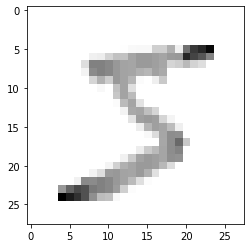

In [8]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

## The model

In [12]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2619 - accuracy: 0.9230
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1050 - accuracy: 0.9667
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0725 - accuracy: 0.9772


## Metrics
 > accuracy : 97%

In [13]:
val_loss , val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0929 - accuracy: 0.9714
0.09289476275444031 0.9714000225067139


In [14]:
model.save('hatey_khori.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: hatey_khori.model/assets


## Inference

In [17]:
new_model = tf.keras.models.load_model('hatey_khori.model')

In [19]:
predictions = new_model.predict(x_test)

In [20]:
print(predictions)

[[3.4718909e-08 1.7370342e-08 4.9166924e-06 ... 9.9996006e-01
  9.2266788e-08 4.9540233e-07]
 [2.3847590e-06 5.1413383e-04 9.9935800e-01 ... 1.7260339e-08
  1.9014951e-06 1.4525529e-10]
 [1.0512291e-07 9.9990332e-01 7.5010576e-07 ... 4.1967240e-05
  3.2339620e-05 7.8284904e-07]
 ...
 [9.2465839e-09 2.6223513e-06 1.2777931e-08 ... 1.7186490e-04
  1.8935118e-05 8.1975460e-03]
 [7.2241651e-06 2.2845148e-07 1.0608860e-08 ... 1.5735914e-07
  2.8659266e-05 3.2705316e-09]
 [5.9766745e-07 1.1607962e-08 5.7155134e-08 ... 2.2366364e-11
  1.8449059e-07 7.8880208e-11]]


In [23]:
import numpy as np
print(np.argmax(predictions[0]))

7


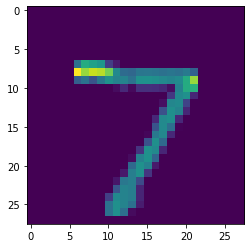

In [24]:
plt.imshow(x_test[0])
plt.show()